KMeans Algorithm

Step1: Choose k value for ex: k=2

Step2: Initialize centroids randomly

Step3: Calculate Euclidean distance from centroids to each data point and form clusters that are close to centroids

Step4: Update the Cluster Classification for each point

Step5: Find the centroid of each cluster and update centroids

Step:6 Repeat step3


In [4]:
# History
# Name    Date        Description
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   
# scl    9-24-201     Add code to calculate SSE 
#                     using the elbow method for k
# scl    9-24-2021    Modify accept different values for k 
# scl    9-25-2021    Add preprocessing for using csv input
#                     tested with LifeExpectancyData.csv
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# First: let's prepare the data that we are going to use
# this is always necessary when do AI and Machine Learning
# it is an important step as data scientists.

# eventually use the elbow method for determining the 
# value of k, but for now lets just set it manually
k = 3

# either read in a csv file or uncomment the lines below
# to randomly generate some test data
# -   -   -   -   -   -   -   -   -   -   -   -   -   -   -   
# read in the Cause of Death US data file
d = pd.read_csv('LifeExpectancyData.csv')
d = d.fillna(0)

# create filter
filter_year = 2011

# apply the filter
filter_year  = (d['Year'] == filter_year)
df_life = d[filter_year]

# Pre processing for Life Expectancy Data Set
# df_life = pd.read_csv('LifeExpectancyData.csv')

# Features are :
col_x = df_life['Schooling']
col_y = df_life['Alcohol']

# Observations :
col_Y = df_life['Life expectancy ']

# replace X - features and y observations
X = np.array([col_x, col_y])
X = X.T
y = col_Y

# if you want to use test data just uncomment
# these lines below.  
# -- scl
# -- NUM_POINTS = 200
# -- s = np.random.randint(1,99)
# -- np.random.seed(s)
# -- X = np.random.randint(1,99, size=(NUM_POINTS,2))
# -- y = np.random.randint(1,k+1, size=len(X))
# -- y = pd.Series(y)

# create the main data frame called data
data = pd.DataFrame(X, columns=['x','y'])
data['class'] = y.values
data.head()

,x,y,class
0,9.5,0.01,59.2
1,13.3,5.37,76.6
2,14.0,0.56,74.9
3,9.4,8.06,51.0
4,14.1,7.84,75.7


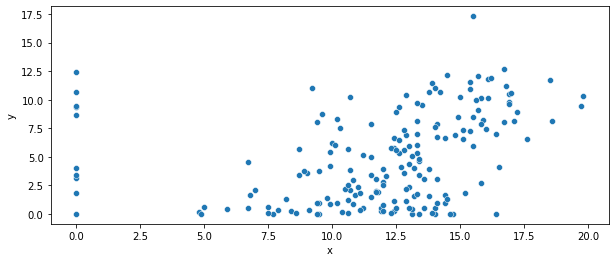

In [7]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=data, x='x', y='y')

In [8]:
def calcDistance(data, p1):
  d = []
  for i in range(len(data)):
    x1 = data.iloc[i].x
    y1 = data.iloc[i].y
    p2 = np.array((x1,y1))
    #d = np.linalg.norm(p1 - p2)
    dx = np.sqrt(np.sum(np.square(p1 - p2)))
    d.append(dx)
  return d

def classifyKMeans(df, kmeans):
  res = []

  # slice and get only the columns with distances
  df_dist = df[df.columns[-kmeans:]]  
  
  # loop through the points and 
  # check the closest distances to classify 
  # which cluster the point belongs to for each iteration
  for row in df_dist.iloc:
    closest = row.min()
    cluster = row.idxmin()
    res.append(cluster)
  df['class'] = res
  return df

# -- scl 
# depricate this function for the one
# above, after testing you can remove
def classifyKMeansUP(df):
  res = []
  for row in df.iloc:
    if row.dist1 < row.dist2:
      res.append(1)
    else:
      res.append(2)
  df['class'] = res
  return df

# -- scl 
# stop here for now
# need to fix how to calculate the
# new centriods after the points are
# classified to a cluster
#  How do you now cla
def calcCentroid(df):
  c = df.groupby(['class'])
  c = c.mean().round(2)
  return c


In [9]:
# create the list of centroids base on the value of k
# to represent the number of clusters to try and
# detect with this data set.
centroids = [0 for x in range(k)]
centroids = calcCentroid(data)

iter = 3
i = 1
for iter in range(iter):
  for i in range (len(centroids)):
    center_point = np.array([(centroids.iloc[i].x, centroids.iloc[i].y)])
    dist = calcDistance(data, center_point)
    data['dist'+str(i)] = dist
    i += 1
  i = 1

  # classify the points
  data = classifyKMeans(data, k)

  # calculate new centriods
  new_centroids = calcCentroid(data)
  centroids = new_centroids

  print('\n- - - - - - - - - - - - - - - - - - - - - - \n')
  print('             ITERATION = ', iter)
  print('\n- - - - - - - - - - - - - - - - - - - - - - \n')

  print(centroids)
  print('\n- - - - - - - - - - - - - - - - - - - - - - \n')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]



- - - - - - - - - - - - - - - - - - - - - - 

             ITERATION =  0

- - - - - - - - - - - - - - - - - - - - - - 

             x      y  dist0  dist1  ...  dist118  dist119  dist120  dist121
class                                ...                                    
dist119   6.15   5.50   5.65   6.05  ...    11.84     7.19     9.46    11.20
dist120  12.67   3.30   4.86   6.55  ...     7.72     7.92     4.92     8.97
dist121  15.78  11.02  10.11  13.07  ...     2.47     6.17     4.59     2.24

[3 rows x 124 columns]

- - - - - - - - - - - - - - - - - - - - - - 


- - - - - - - - - - - - - - - - - - - - - - 

             ITERATION =  1

- - - - - - - - - - - - - - - - - - - - - - 

             x      y  dist0  dist1  ...  dist118  dist119  dist120  dist121
class                                ...                                    
dist119   6.15   5.50   5.42   8.08  ...    11.84     7.19     9.46    11.20
dist120  12.67   3.30   7.55   3.23  ...     7.72     7.92     4.92  

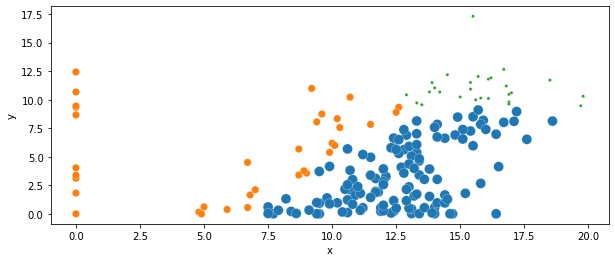

In [10]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=data, x=data.x, y=data.y, size='class', sizes=(10,100), hue='class', legend=False)